In [7]:
##INSTALLATIONS
# Load the WGCNA package
source("https://bioconductor.org/biocLite.R")
#bioConductor("WGCNA")
biocLite("WGCNA")
#biocLite("org.Mm.eg.db")
#biocLite("heatmap3")
#install.packages("splitstackshape")


Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘WGCNA’
also installing the dependencies ‘mvtnorm’, ‘pcaPP’, ‘fit.models’, ‘rrcov’, ‘dynamicTreeCut’, ‘matrixStats’, ‘impute’, ‘preprocessCore’, ‘GO.db’, ‘robust’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'checkmate', 'curl', 'data.table', 'ddalpha',
  'dplyr', 'glmnet', 'glue', 'lava', 'lazyeval', 'lme4', 'lubridate', 'pryr',
  'purrr', 'quantmod', 'quantreg', 'Rcpp', 'RcppArmadillo', 'tidyr',
  'tidyselect'


In [4]:
library(splitstackshape)
library(limma)
library(edgeR)
library(ggplot2)
library(gplots)
library(heatmap3)
#library(biomaRt)
library(WGCNA)
options(stringsAsFactors = FALSE);
enableWGCNAThreads()

setwd("/home/h1bennet/liverStrains/results/180515_WGCNA/")


Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust

Warning message:
“replacing previous import ‘stats::sd’ by ‘BiocGenerics::sd’ when loading ‘S4Vectors’”Warning message:
“replacing previous import ‘stats::var’ by ‘BiocGenerics::var’ when loading ‘S4Vectors’”Warning message:
“multiple methods tables found for ‘var’”Warning message:
“multiple methods tables found for ‘sd’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”Warning message:
“replacing previous import ‘BiocGenerics::rowSums’ by ‘S4Vectors::rowSums’ when loading ‘AnnotationDbi’”Warning message:
“replacing previous import ‘BiocGenerics::var’ by ‘S4Vectors::var’ when loading ‘AnnotationDbi’”Warning messa

*
*  Package WGCNA 1.51 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=56
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=56
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



Allowing parallel execution with up to 55 working processes.


In [310]:
targets <- read.table("~/strains/targets_may_11th.txt", sep="\t", header= TRUE)
counts = read.csv('/home/iholtman/strains/counts/RNA-seq/analyze_repeats_raw_condensegenes_count_exons_strand_both.txt', sep='\t', header= TRUE)
Annotation = counts[,1:8]
Annotation <- cSplit(Annotation, splitCols = "Annotation.Divergence", sep = "|")
counts = counts[,9:dim(counts)[2]]
rownames(counts) = Annotation$Annotation.Divergence_01


In [311]:
targets

Files,Name,Strain,Treatment,color_strain,color_treatment,Replicate,Group,Strain_Balb,Strain_C57,Strain_NOD,Strain_PWK,Strain_Spret,Treatment_KLA,Strain_Balb_KLA,Strain_C57_KLA,Strain_NOD_KLA,Strain_PWK_KLA,Strain_Spret_KLA
BALB_BMDM_polyA_RNA_KLA_1h_BC_15_10_20.counts,BALB_KLA_1,BALB,KLA,dodgerblue,black,1,BALB_KLA,1,0,0,0,0,1,1,0,0,0,0
BALB_BMDM_polyA_RNA_KLA_1h_BC_16_03_08.counts,BALB_KLA_2,BALB,KLA,dodgerblue,black,2,BALB_KLA,1,0,0,0,0,1,1,0,0,0,0
BALB_BMDM_polyA_RNA_notx_BC_15_10_20.counts,BALB_notx_1,BALB,notx,dodgerblue,white,1,BALB_notx,1,0,0,0,0,0,0,0,0,0,0
BALB_BMDM_polyA_RNA_notx_BC_16_03_08.counts,BALB_notx_2,BALB,notx,dodgerblue,white,2,BALB_notx,1,0,0,0,0,0,0,0,0,0,0
C57_BMDM_polyA_RNA_KLA_1h_BC_15_10_20.counts,C57_KLA_1,C57,KLA,indianred1,black,1,C57_KLA,0,1,0,0,0,1,0,1,0,0,0
C57_BMDM_polyA_RNA_KLA_1h_BC_16_03_08.counts,C57_KLA_2,C57,KLA,indianred1,black,2,C57_KLA,0,1,0,0,0,1,0,1,0,0,0
C57_BMDM_polyA_RNA_notx_BC_15_10_20.counts,C57_notx_1,C57,notx,indianred1,white,1,C57_notx,0,1,0,0,0,0,0,0,0,0,0
C57_BMDM_polyA_RNA_notx_BC_16_03_08.counts,C57_notx_2,C57,notx,indianred1,white,2,C57_notx,0,1,0,0,0,0,0,0,0,0,0
NOD_BMDM_polyA_RNA_KLA_1h_BC_15_10_20.counts,NOD_KLA_1,NOD,KLA,darkseagreen2,black,1,NOD_KLA,0,0,1,0,0,1,0,0,1,0,0
NOD_BMDM_polyA_RNA_KLA_1h_BC_16_03_08.counts,NOD_KLA_2,NOD,KLA,darkseagreen2,black,2,NOD_KLA,0,0,1,0,0,1,0,0,1,0,0


In [312]:
Col = cbind(as.character(targets$color_strain), as.character(targets$color_treatment))
colnames(Col) = c("strain", "treatment")
  

In [4]:
dge <- DGEList(counts=counts)
dge <- calcNormFactors(dge, method= "upperquartile")
design <- model.matrix(~targets$Strain + targets$Treatment, data=dge$samples)

keep <- rowSums(cpm(dge)>1) >= 2 & Annotation$Length > 250
Annotation <- Annotation[keep,]
dge <- dge[keep, keep.lib.sizes=FALSE]
M1 <- cpm(dge, log=TRUE)


In [108]:
##Mean expression matrix per strain and treatment 
mM1 = data.frame(row.names=rownames(M1))

for (strain in unique(targets$Strain))
for (treatment in unique(targets$Treatment))

mM1[paste(strain, treatment, sep= '_')] = apply(M1[,targets$Strain == strain  & targets$Treatment == treatment],1,mean)
mM1 <- mM1 - rowMeans(mM1)
    

In [12]:
######################
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=30, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(t(M1), powerVector = powers)
# Plot the results:
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");


   Power SFT.R.sq   slope truncated.R.sq mean.k. median.k. max.k.
1      1  0.86600  4.8300          0.985 4370.00   4510.00 5680.0
2      2  0.69200  1.8400          0.959 2160.00   2230.00 3410.0
3      3  0.36900  0.7350          0.897 1260.00   1270.00 2310.0
4      4  0.00859  0.0809          0.771  807.00    789.00 1700.0
5      5  0.14300 -0.3440          0.731  552.00    519.00 1310.0
6      6  0.34500 -0.6300          0.745  395.00    355.00 1050.0
7      7  0.47400 -0.8340          0.777  293.00    251.00  857.0
8      8  0.57700 -0.9470          0.833  223.00    182.00  715.0
9      9  0.64200 -1.0300          0.866  174.00    135.00  606.0
10    10  0.69500 -1.1100          0.888  139.00    102.00  520.0
11    12  0.74600 -1.2600          0.913   91.70     61.30  401.0
12    14  0.76100 -1.3900          0.916   63.70     38.90  321.0
13    16  0.79100 -1.4500          0.938   45.90     25.50  263.0
14    18  0.81200 -1.5100          0.950   34.20     17.30  220.0
15    20  

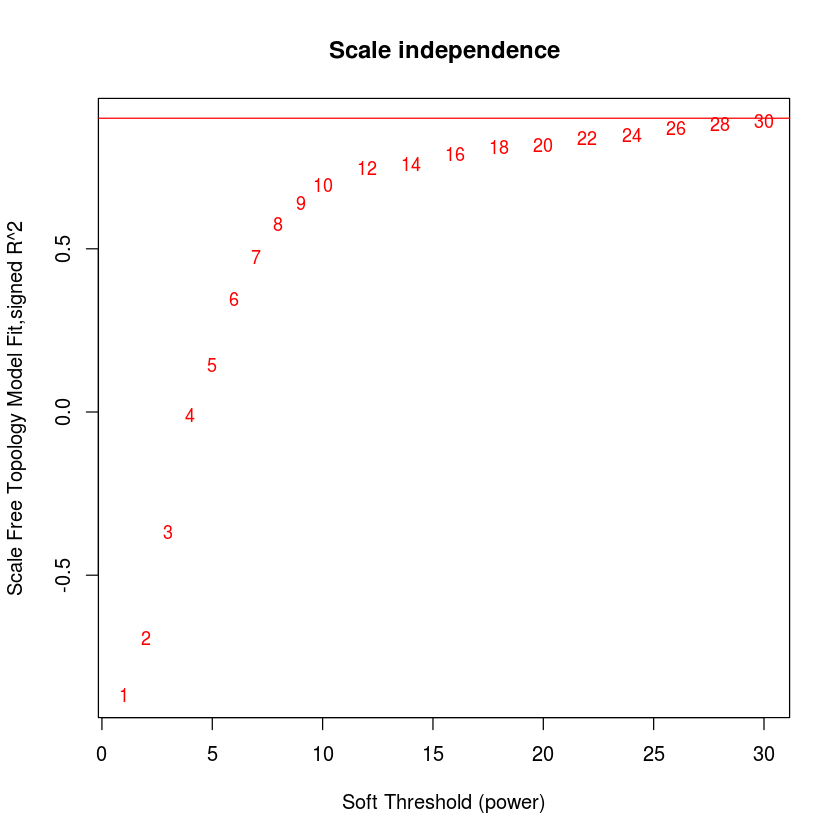

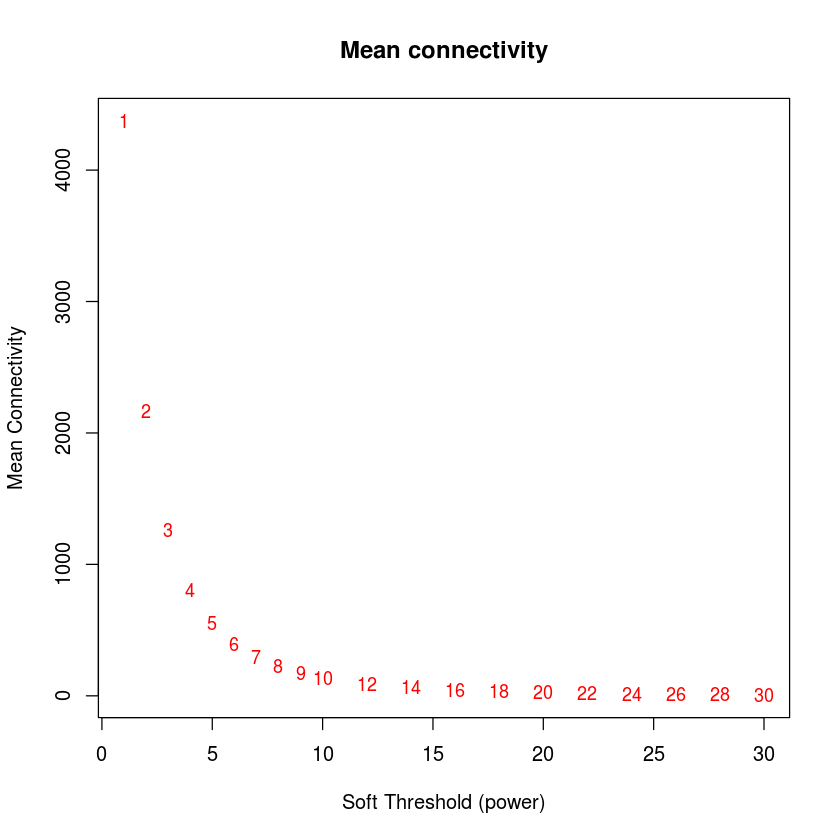

In [13]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");

# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
## Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")



In [ ]:
###################
softPower = 20;
adjacency = adjacency(t(M1), type= "signed", power = softPower);

############### 
# Turn adjacency into topological overlap
TOM = TOMsimilarity(adjacency, TOMType= "signed");
dissTOM = 1-TOM
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");
# Plot the resulting clustering tree (dendrogram)
sizeGrWindow(12,9)
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
     labels = FALSE, hang = 0.04);

minModuleSize = 250
cutheight = 0.99

dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM, cutHeight= cutheight,
                            deepSplit = 0, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize, pamStage= TRUE)
table(dynamicMods)


In [ ]:
minModuleSize = 200
cutheight = 0.99

dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM, cutHeight= cutheight,
                            deepSplit = 0, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize, pamStage= TRUE)
table(dynamicMods)


In [ ]:
dynamicColors_cut200 = labels2colors(dynamicMods)
table(dynamicColors_cut100)
table(dynamicColors_cut150)

plotDendroAndColors(geneTree, cbind(dynamicColors, dynamicColors_cut100, dynamicColors_cut150, dynamicColors_cut200, brewer_dynamicColors), "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = FALSE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")


In [7]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
sizeGrWindow(8,6)

#pdf("Network_dendrogram_min=200_deepsplit=0.pdf")
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = FALSE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")
#dev.off()

dynamicColors
      black        blue       brown       green greenyellow        grey 
        984        1498        1459        1133         453         422 
    magenta        pink      purple         red   turquoise      yellow 
        907         960         604        1108        1859        1231 

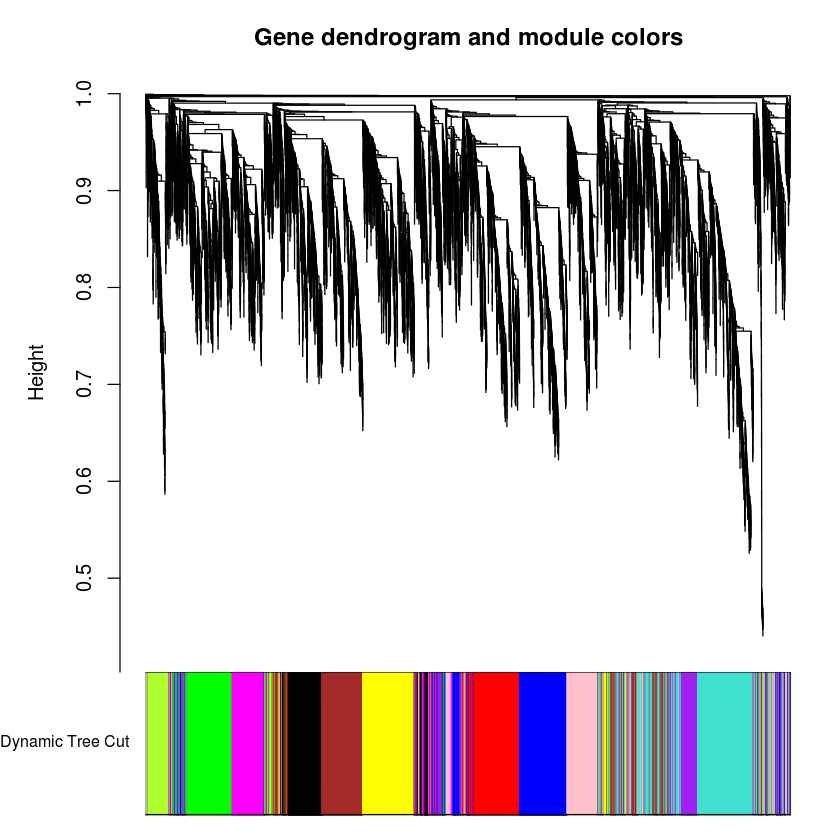

In [12]:
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = FALSE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")


In [73]:
col_clusters

[1] "#9E0142" "#D53E4F" "#F46D43" "#FDAE61" "#FEE08B" "#FFFFBF" "#E6F598"
 [8] "#ABDDA4" "#66C2A5" "#3288BD" "#5E4FA2"

In [81]:
unique(dynamicColors)

[1] "brown"       "turquoise"   "green"       "red"         "greenyellow"
 [6] "black"       "purple"      "magenta"     "yellow"      "blue"       
[11] "pink"        "grey"

In [99]:
?colorRampPalette

In [98]:
unique(brewer_dynamicColors)

[1] "#5CB7A9" "#5E4FA2" "#D0EC9C" "#F3FAAD" "#D0384D" "#FEF0A7" "#EE6445"
 [8] "#FA9C58" "#98D5A4" "#3682BA" "#FDCD7B" "#D3D3D3"

png 
  2

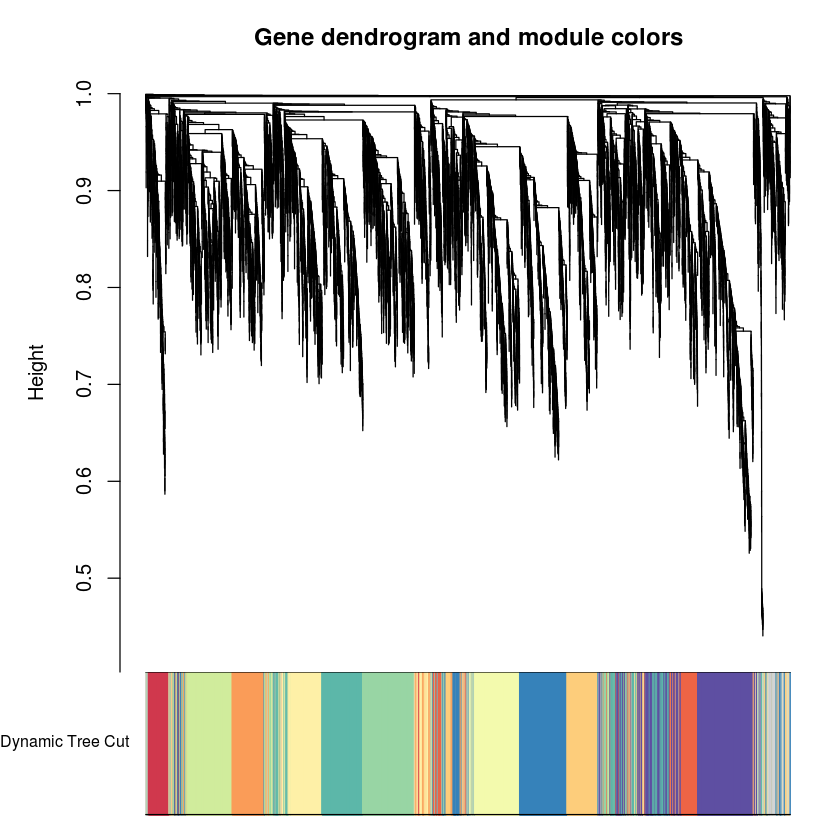

In [14]:
pdf('WGCNA_dendrogram.pdf')
plotDendroAndColors(geneTree, cbind(brewer_dynamicColors) , "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = FALSE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")
dev.off()


plotDendroAndColors(geneTree, cbind(brewer_dynamicColors) , "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = FALSE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")


In [87]:
##Trait associated 
#levels: BCNPS
m <- matrix(0, ncol = 15, nrow = 20)
colnames(m) <- c("B", "C", "N", "P", "S", "BC", "BN", "BP", "BS", "CN", "CP", "CS", "NP", "NS", "PS")

#First level
m[1:4,1] = 1 
m[5:8,2] = 1 
m[9:12,3] = 1 
m[13:16,4] = 1 
m[17:20,5] = 1 

#Second level
m[1:8,6] = 1 
m[c(1:4, 9:12),7] = 1 
m[c(1:4, 13:16),8] = 1 
m[c(1:4, 17:20),9] = 1 

m[c(5:8,9:12) ,10] = 1 
m[c(5:8, 13:16),11] = 1 
m[c(5:8, 17:20),12] = 1 

m[c(9:12,13:16),13] = 1 
m[c(9:12,17:20),14] = 1 

m[c(13:16,17:20),15] = 1 

m <- cbind(m,targets[,14:19])
Strains_permutations <- m


In [88]:
dim(M1)

[1] 12618    20

In [89]:
Strains_permutations

B,C,N,P,S,BC,BN,BP,BS,CN,⋯,CS,NP,NS,PS,Treatment_KLA,Strain_Balb_KLA,Strain_C57_KLA,Strain_NOD_KLA,Strain_PWK_KLA,Strain_Spret_KLA
1,0,0,0,0,1,1,1,1,0,⋯,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,1,1,1,1,0,⋯,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,1,0,0,0,1,⋯,1,0,0,0,1,0,1,0,0,0
0,1,0,0,0,1,0,0,0,1,⋯,1,0,0,0,1,0,1,0,0,0
0,1,0,0,0,1,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,1,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,1,0,0,1,⋯,0,1,1,0,1,0,0,1,0,0
0,0,1,0,0,0,1,0,0,1,⋯,0,1,1,0,1,0,0,1,0,0


In [90]:
###########
MEList = moduleEigengenes(t(M1), colors = dynamicColors)
MEs = MEList$eigengenes
MEDiss = 1-cor(MEs);
METree = hclust(as.dist(MEDiss), method = "average");
sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes",
     xlab = "", sub = "")

nGenes = ncol(t(M1));
nSamples = nrow(t(M1));

In [381]:
#MEList = moduleEigengenes(t(M1), colors = brewer_dynamicColors)
#MEs = MEList$eigengenes

# Recalculate MEs with color labels
MEs0 = moduleEigengenes(t(M1), dynamicColors)$eigengenes
MEs = orderMEs(MEs0)

##Module Trait Correlations 
moduleTraitCor = cor(MEs0, m, use = "p"); #strain_permutations
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);
moduleTraitPvalue <- p.adjust(moduleTraitPvalue, method = "fdr", n = dim(Strains_permutations)[2] * length(unique(dynamicColors)))

##Filter - change colors
moduleTraitCor2 <- moduleTraitCor
moduleTraitCor2[moduleTraitPvalue > 0.001] = 0 

#Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                    signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
par(mar = c(6, 8.5, 3, 3));


In [438]:
module_colors = cbind(names(sort(table(brewer_dynamicColors))), names(sort(table(dynamicColors))))

In [466]:
module_colors = cbind(names(sort(table(dynamicColors))), names(sort(table(brewer_dynamicColors))), as.character(sort(table(brewer_dynamicColors))))
module_colors = module_colors[order(module_colors[,1]),]


In [471]:
as.numeric(module_colors[,3]) + 1

[1]  985 1499 1460 1134  454  423  908  961  605 1109 1860 1232

In [472]:
module_colors[order(as.numeric(module_colors[,3])),]

grey,#D3D3D3,422
greenyellow,#D0384D,453
purple,#EE6445,604
magenta,#FA9C58,907
pink,#FDCD7B,960
black,#FEF0A7,984
red,#F3FAAD,1108
green,#D0EC9C,1133
yellow,#98D5A4,1231
brown,#5CB7A9,1459
blue,#3682BA,1498


In [441]:
moduleTraitCor2

,B,C,N,P,S,BC,BN,BP,BS,CN,⋯,CS,NP,NS,PS,Treatment_KLA,Strain_Balb_KLA,Strain_C57_KLA,Strain_NOD_KLA,Strain_PWK_KLA,Strain_Spret_KLA
MEblack,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.9657579,0.0000000,0,0,0,0,0
MEblue,0,0,0.0000000,0.0000000,-0.9763520,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEbrown,0,0,0.0000000,0.0000000,0.9767810,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEgreen,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.8437799,0,0.0000000,⋯,0,0,-0.8418895,0.0000000,0.0000000,0,0,0,0,0
MEgreenyellow,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.9506628,0,0,0,0,0
MEgrey,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,-0.9847398,0,0,0,0,0
MEmagenta,0,0,0.0000000,0.9458347,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEpink,0,0,0.9938380,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEpurple,0,0,0.0000000,-0.8000162,0.0000000,0.7819718,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,-0.8739550,0.0000000,0,0,0,0,0
MEred,0,0,0.0000000,0.0000000,-0.8336411,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,-0.9197957,0.0000000,0,0,0,0,0


In [459]:
moduleTraitCor2[order(module_colors[,1]),]

,B,C,N,P,S,BC,BN,BP,BS,CN,⋯,CS,NP,NS,PS,Treatment_KLA,Strain_Balb_KLA,Strain_C57_KLA,Strain_NOD_KLA,Strain_PWK_KLA,Strain_Spret_KLA
MEblack,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.9657579,0.0000000,0,0,0,0,0
MEblue,0,0,0.0000000,0.0000000,-0.9763520,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEbrown,0,0,0.0000000,0.0000000,0.9767810,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEgreen,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.8437799,0,0.0000000,⋯,0,0,-0.8418895,0.0000000,0.0000000,0,0,0,0,0
MEgreenyellow,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.9506628,0,0,0,0,0
MEgrey,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,-0.9847398,0,0,0,0,0
MEmagenta,0,0,0.0000000,0.9458347,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEpink,0,0,0.9938380,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,0
MEpurple,0,0,0.0000000,-0.8000162,0.0000000,0.7819718,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,-0.8739550,0.0000000,0,0,0,0,0
MEred,0,0,0.0000000,0.0000000,-0.8336411,0.0000000,0,0.0000000,0,0.0000000,⋯,0,0,0.0000000,-0.9197957,0.0000000,0,0,0,0,0


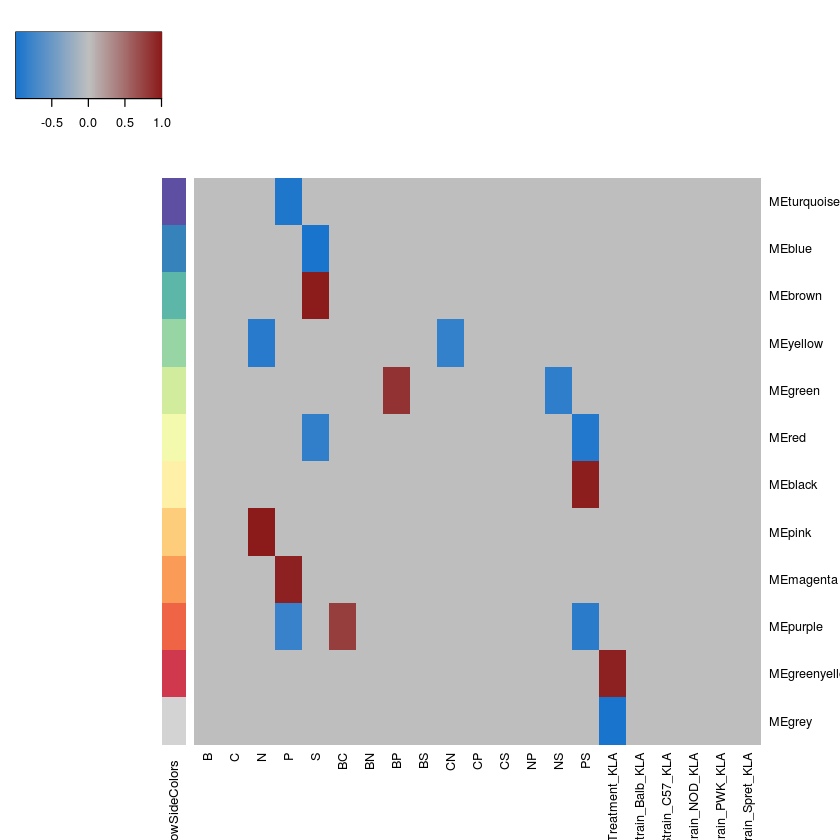

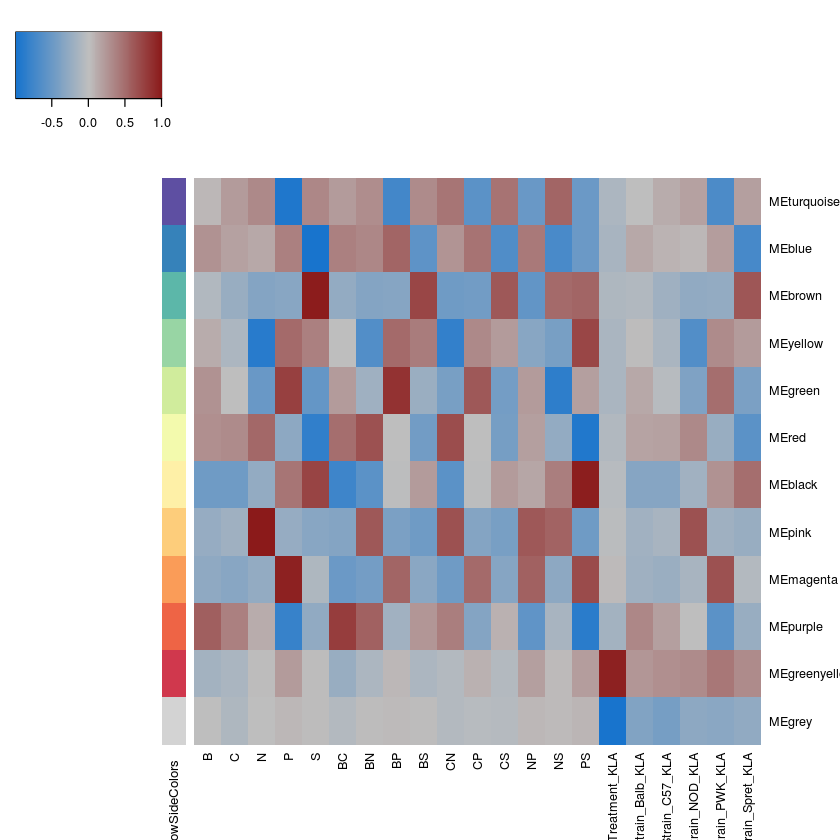

In [474]:
heatmap3(moduleTraitCor2[order(as.numeric(module_colors[,3])),], Rowv = NA,Colv=NA, RowSideColors = module_colors[order(as.numeric(module_colors[,3])),2],scale="none", col=colorpanel(150, "dodgerblue3","grey","firebrick4"))
heatmap3(moduleTraitCor[order(as.numeric(module_colors[,3])),], Rowv = NA,Colv=NA, RowSideColors = module_colors[order(as.numeric(module_colors[,3])),2],scale="none", col=colorpanel(150, "dodgerblue3","grey","firebrick4"))
#heatmap3(moduleTraitCor[order(names(sort(table(brewer_dynamicColors)))),], Rowv = NA,Colv=NA, RowSideColors = Y_color_brewer[order(names(sort(table(brewer_dynamicColors))))],scale="none", col= colorpanel(150, "dodgerblue3","grey","firebrick4"))


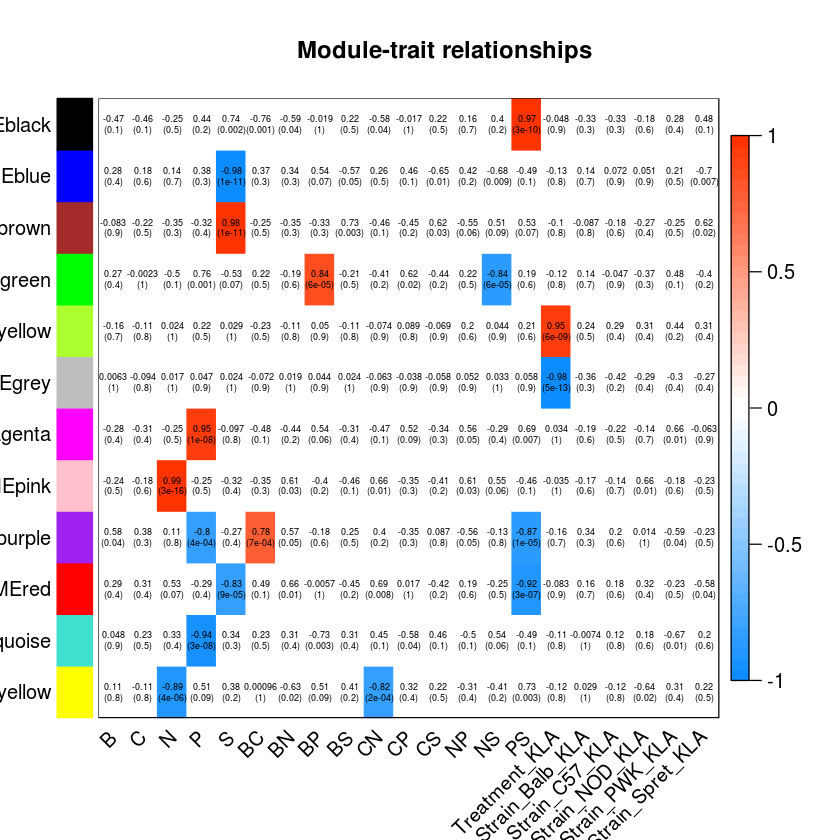

In [385]:
labeledHeatmap(Matrix = moduleTraitCor2,
               xLabels = colnames(Strains_permutations),
               yLabels = names(MEs0),
               ySymbols = names(MEs0),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.45,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))

In [352]:
?labeledHeatmap

In [477]:
##########
#PCA
PCs    = moduleEigengenes(t(M1),  colors=brewer_dynamicColors)
ME    = PCs$eigengenes
distPC = 1-(1+cor(ME,use="p"))/2 # (for signed network)
distPC = ifelse(is.na(distPC), 0, distPC)
pcTree = hclust(as.dist(distPC),method="a")
MDS   = cmdscale(as.dist(distPC),2)
colors = names(table(dynamicColors))



In [478]:
pdf("ModuleEigengeneVisualizations_min=250_deepsplit=0.pdf",height=6,width=6)
par(mfrow=c(1,1), mar=c(0, 3, 1, 1) + 0.1, cex=1)
plot(pcTree, xlab="",ylab="",main="",sub="")
plot(MDS, col= colors,  main="MDS plot", cex=2, pch=19)
ordergenes = geneTree$order

for (which.module in names(table(brewer_dynamicColors))){
  MEs = ME[, paste("ME",which.module, sep="")]
  barplot(MEs, col=which.module, main="", cex.main=2,
          ylab="eigengene expression",xlab="array sample")
};
dev.off();

png 
  2

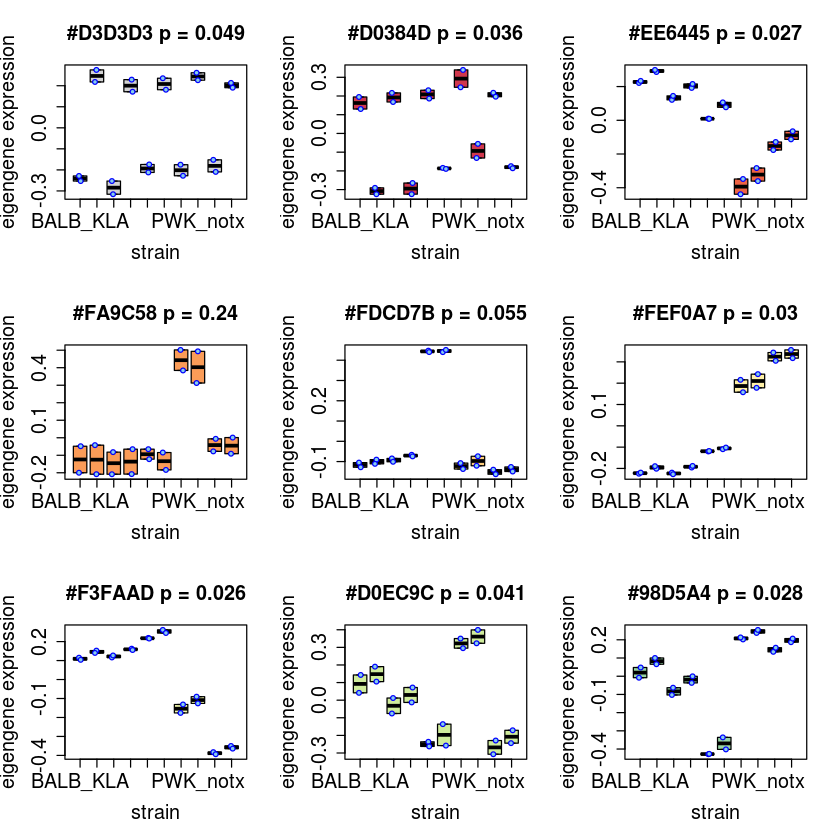

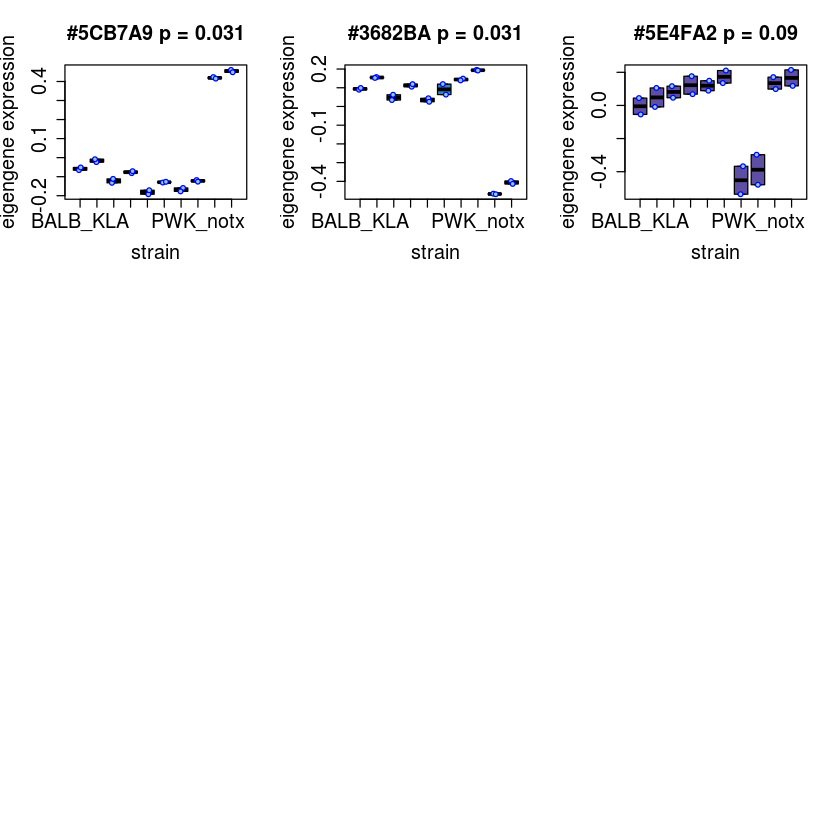

In [481]:
par(mfrow = c(3,3))
for (which.module in module_colors[order(as.numeric(module_colors[,3])),2]){
  MEs = ME[, paste("ME",which.module, sep="")]
  verboseBoxplot(MEs, targets$Group, col=which.module, 
                 ylab="eigengene expression",xlab="strain", notch=FALSE, main = which.module)
};

png 
  2

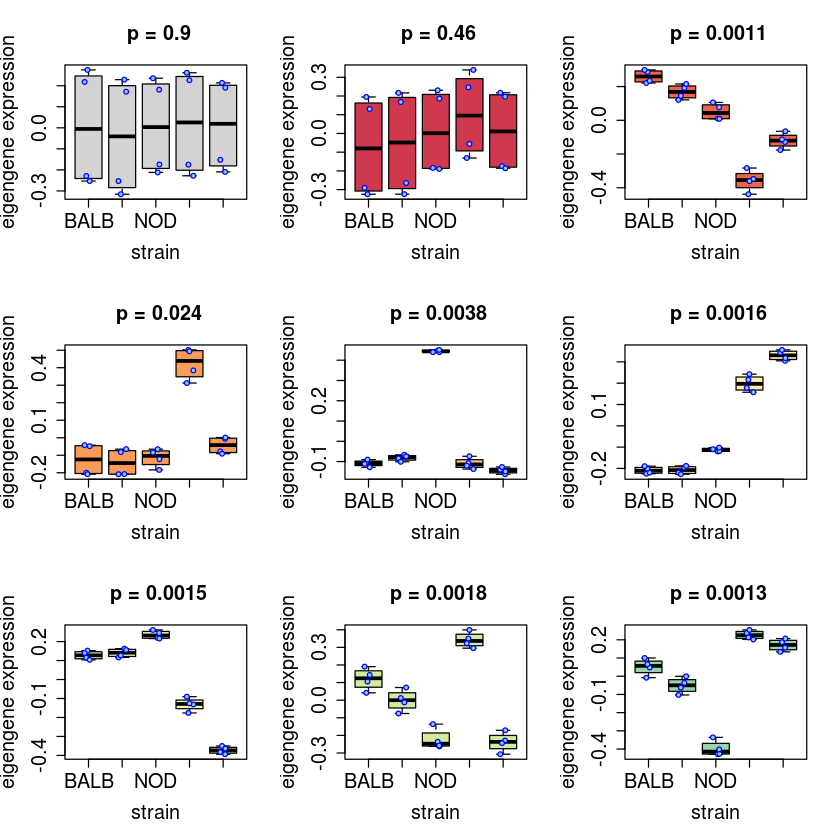

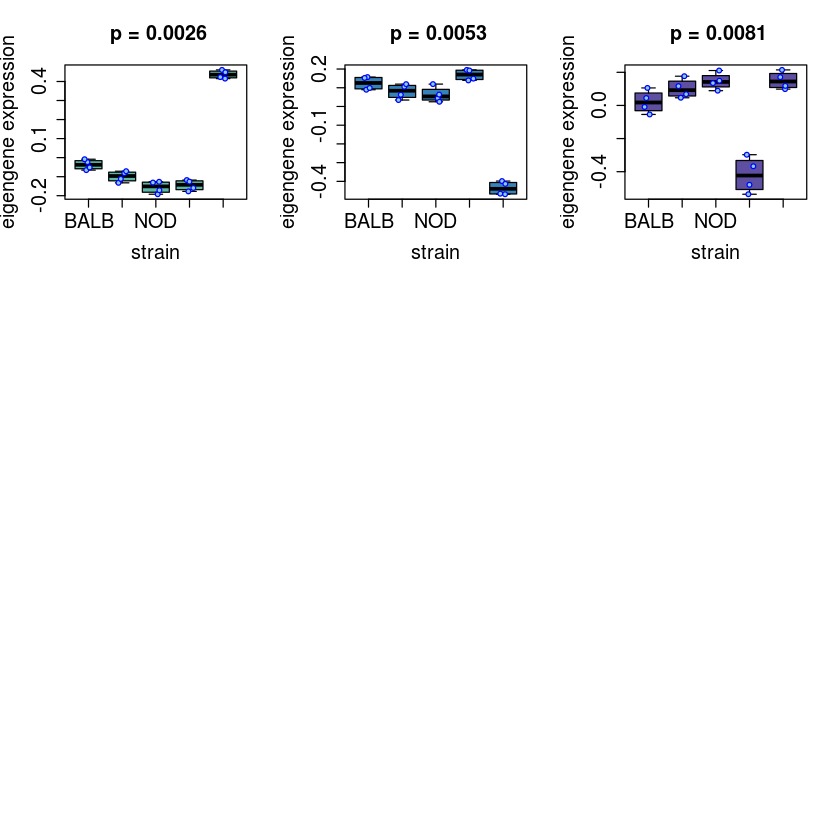

In [486]:
pdf("ModuleEigengeneVisualization_verboseboxplots_groups_min=250_deepsplit=0.pdf",height=8,width=8)
for (which.module in module_colors[order(as.numeric(module_colors[,3])),2]){
  MEs = ME[, paste("ME",which.module, sep="")]
  verboseBoxplot(MEs, targets$Strain, col=which.module, 
                 ylab="eigengene expression",xlab="strain", notch=FALSE)
};
dev.off();

par(mfrow = c(3,3))



for (which.module in module_colors[order(as.numeric(module_colors[,3])),2]){
  MEs = ME[, paste("ME",which.module, sep="")]
  verboseBoxplot(MEs, targets$Strain, col=which.module, 
                 ylab="eigengene expression",xlab="strain", notch=FALSE)
};

In [121]:
save.image('R-session_new.RData')

In [2]:
load("R-session_new.RData")


In [7]:
Modules_reordered = dynamicMods + 101
table(Modules_reordered)

Modules_reordered
 101  102  103  104  105  106  107  108  109  110  111  112 
 422 1859 1498 1459 1231 1133 1108  984  960  907  604  453 

In [26]:
order(-data.frame(table(dynamicMods))[,2]) + 100

[1] 102 103 104 105 106 107 108 109 110 111 112 101

In [29]:
###Order the modules from large to small 
Modules_reordered = dynamicMods + 101
for (i in 1:length(unique(dynamicMods))){ 
  Modules_reordered[Modules_reordered == (order(-data.frame(table(dynamicMods))[,2])[i] + 100)] = i 
}

In [30]:
table(dynamicMods)
table(Modules_reordered)

dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11 
 422 1859 1498 1459 1231 1133 1108  984  960  907  604  453 

Modules_reordered
   1    2    3    4    5    6    7    8    9   10   11   12 
1859 1498 1459 1231 1133 1108  984  960  907  604  453  422 

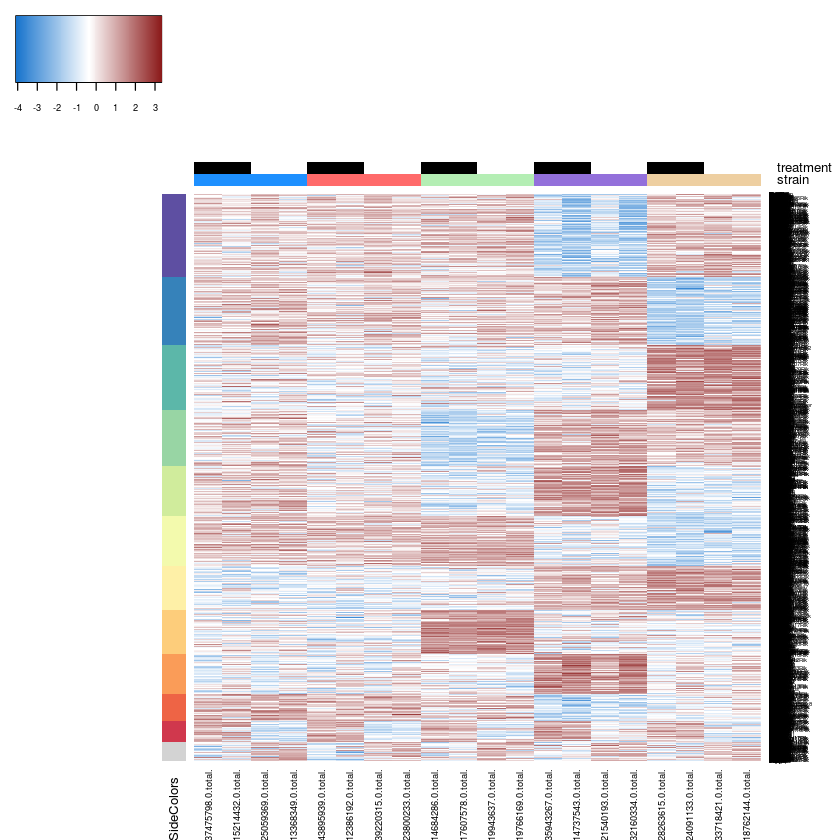

png 
  2

png 
  2

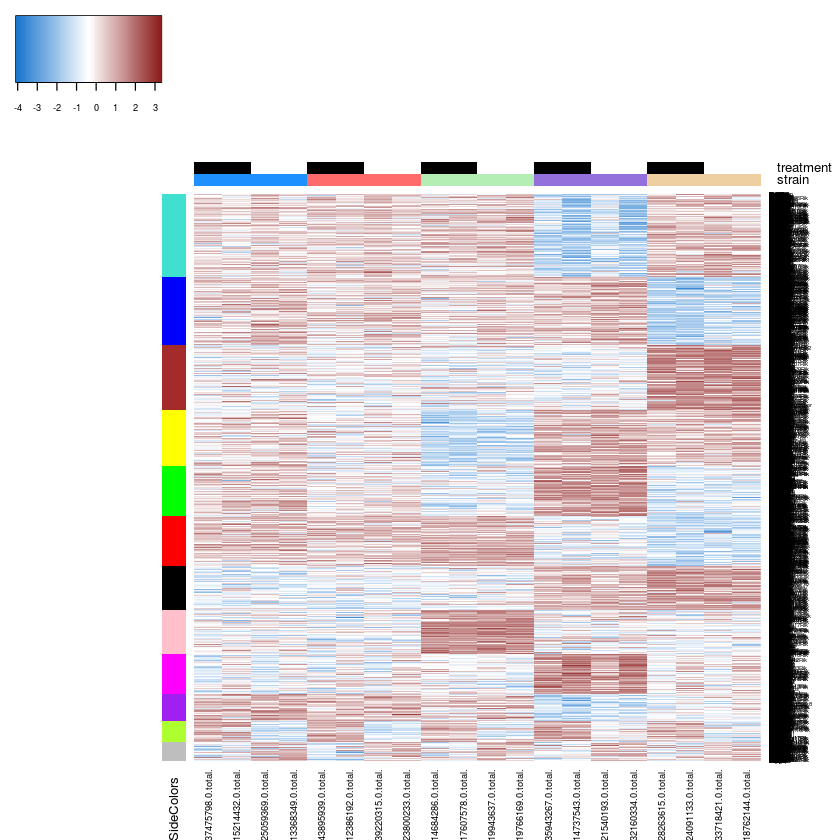

In [536]:
sM1 <- M1[order(-Modules_reordered),]

sdynamicColors = dynamicColors[order(-Modules_reordered)]
sbrewer_dynamicColors = brewer_dynamicColors[order(-Modules_reordered)]

heatmap3(sM1, Rowv = NA, Colv= NA,  scale="row", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))
heatmap3(sM1, Rowv = NA, Colv= NA, scale="row", ColSideColors = Col, RowSideColors = sdynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))    

pdf('WGCNA_heatmap_Z-score_WGCNA_colors.pdf')
heatmap3(sM1, Rowv = NA, Colv= NA,scale="row", ColSideColors = Col, RowSideColors = sdynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))
dev.off()

pdf('WGCNA_heatmap_Z-score_new_colors.pdf')
heatmap3(sM1, Rowv = NA, Colv= NA, scale="row", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))
dev.off()


png 
  2

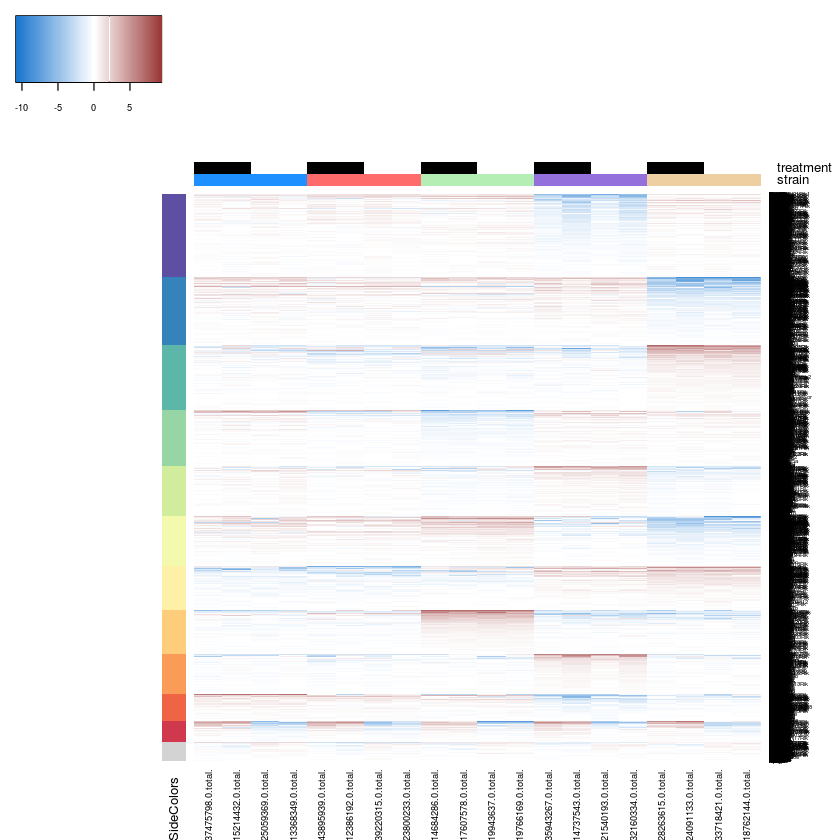

In [544]:
##Expression ordering as well
sM1 <- M1[order(-Modules_reordered, apply(abs(mM1), 1,max)),]
smM1 <- mM1[order(-Modules_reordered, apply(abs(mM1), 1,max)),]
sM1 <- sM1 - rowMeans(sM1)
sdynamicColors = dynamicColors[order(-Modules_reordered, apply(abs(mM1), 1,max))]
sbrewer_dynamicColors = brewer_dynamicColors[order(-Modules_reordered, apply(abs(mM1), 1,max))]

heatmap3(sM1, balanceColor = TRUE, Rowv = NA, Colv= NA, scale="none", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))

pdf('WGCNA_heatmap_logFC_new_colors.pdf')
heatmap3(sM1, balanceColor = TRUE, Rowv = NA, Colv= NA, scale="none", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "dodgerblue3","white","firebrick4"))
dev.off()


#### Make a legend 

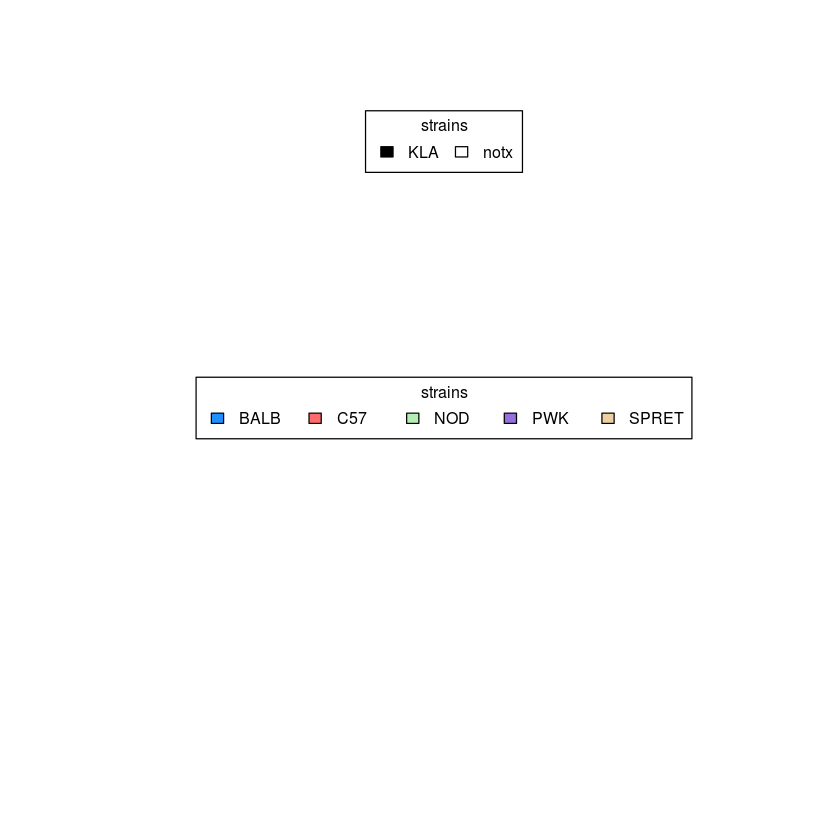

In [340]:
plot.new()
legend("center", inset=.02, title="strains",
   unique(targets$Strain), fill=unique(targets$color_strain), horiz=TRUE, cex=0.8)
legend("top", inset=.02, title="strains",
   unique(targets$Treatment), fill=unique(targets$color_treatment), horiz=TRUE, cex=0.8)


In [111]:
?heatmap3

## TPM heatmap

In [115]:
TPM = read.csv('/home/iholtman/strains/counts/RNA-seq/analyze_repeats_tpm_condensegenes_count_exons_strand_both.txt', sep ='\t', header = TRUE)
Annotation_TPM = TPM[,1:8]
Annotation_TPM <- cSplit(Annotation_TPM, splitCols = "Annotation.Divergence", sep = "|")
TPM = TPM[,9:dim(TPM)[2]]
rownames(TPM) = Annotation_TPM$Annotation.Divergence_01


png 
  2

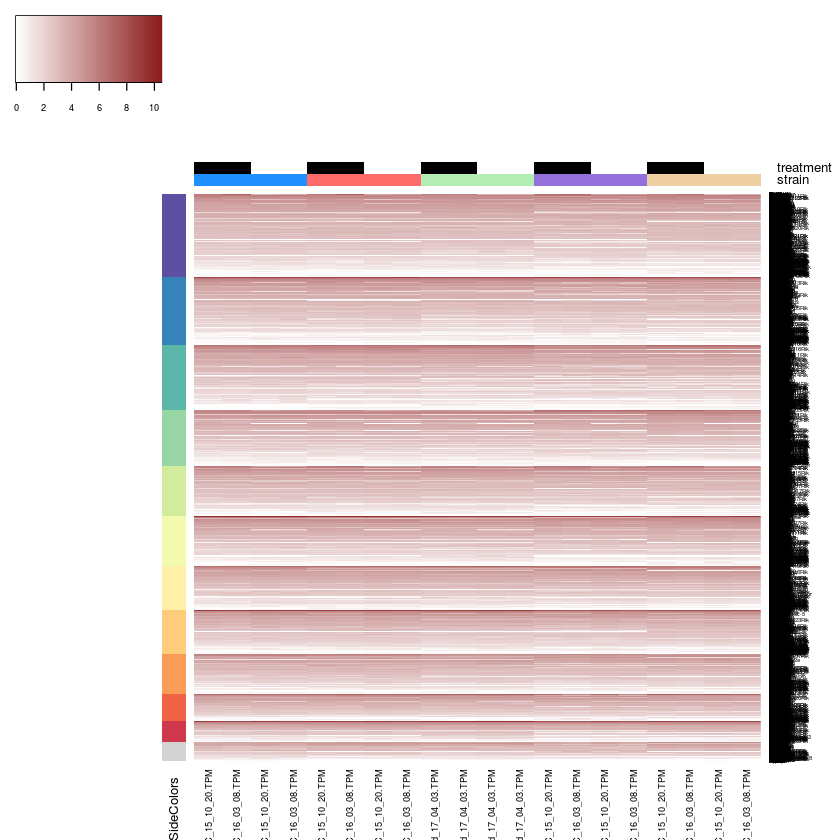

In [537]:
##match to count 
sTPM = TPM[match(rownames(sM1), rownames(TPM)),]
log_sTPM = log(sTPM + 1)

sbrewer_dynamicColors_TPM = brewer_dynamicColors[order(-Modules_reordered, apply(abs(log_sTPM), 1,max))]
log_sTPM <- log_sTPM[order(-Modules_reordered, apply(abs(log_sTPM), 1,max)),]

heatmap3(log_sTPM, Rowv = NA, Colv= NA, scale="none", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors_TPM, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "white","firebrick4"))

pdf('WGCNA_heatmap_TPM.pdf')
heatmap3(log_sTPM, Rowv = NA, Colv= NA, scale="none", ColSideColors = Col, RowSideColors = sbrewer_dynamicColors_TPM, cexRow = 0.2 + 1/log10(nrow(sM1)), cexCol = 0.7, col=colorpanel(150, "white","firebrick4"))
dev.off()


In [553]:
modules_count = sbrewer_dynamicColors

counter = 12 
for (module in names(sort(table(sbrewer_dynamicColors)))){
    modules_count[sbrewer_dynamicColors == module] =  paste('module' , counter, sep = '_')
    counter = counter - 1  
    }



In [554]:
table(modules_count)

modules_count
 module_1 module_10 module_11 module_12  module_2  module_3  module_4  module_5 
     1859       604       453       422      1498      1459      1231      1133 
 module_6  module_7  module_8  module_9 
     1108       984       960       907 

In [557]:
info = cbind(rownames(smM1), modules_count, sbrewer_dynamicColors, smM1)

In [558]:
print(info[1:10,])

        rownames(smM1) modules_count sbrewer_dynamicColors    BALB_KLA
Hnrnpr          Hnrnpr     module_12               #D3D3D3  0.03591940
Senp3            Senp3     module_12               #D3D3D3  0.03377081
Arhgef1        Arhgef1     module_12               #D3D3D3 -0.04169498
Api5              Api5     module_12               #D3D3D3  0.06587841
Ppm1a            Ppm1a     module_12               #D3D3D3 -0.02465067
Dcaf13          Dcaf13     module_12               #D3D3D3  0.04741961
Mcts1            Mcts1     module_12               #D3D3D3  0.09411241
Ipo8              Ipo8     module_12               #D3D3D3  0.01108259
Pramef8        Pramef8     module_12               #D3D3D3  0.08255136
Zdhhc5          Zdhhc5     module_12               #D3D3D3  0.03095518
          BALB_notx     C57_KLA    C57_notx     NOD_KLA     NOD_notx
Hnrnpr   0.03594282 -0.01036887  0.05726774 -0.04795556 -0.040679034
Senp3    0.01225298 -0.05956214  0.04026666 -0.01705397 -0.069571496
Arhgef1 -0.0

In [563]:
write.table(info, 'Module_genes_and_expression.txt', sep = '\t', col.names= NA, quote=FALSE)


In [125]:
counter = 12 
for (cluster in names(sort(table(brewer_dynamicColors)))) {
print(cluster)
print(counter)    
print(sum(brewer_dynamicColors == cluster))
x = rownames(info[brewer_dynamicColors == cluster,])
print(cat(x, ' '))
counter = counter - 1
    
}


[1] "#D3D3D3"
[1] 12
[1] 422
Jrkl Scaper Camk2b Pdpr Eif3j1 Tubgcp6 Zfp623 Nhp2 Atxn7l1os2 Zfp157 Mlst8 Zfp128 Chst10 2310039H08Rik Pcdhgc3 Zfp937 Rpl36al Lsm10 Zfp39 Elp6 Snrnp70 Rnf144b Rassf1 Tapbpl Tamm41 Inip Bak1 4933417G07Rik AI429214 Rdx Cdan1 Zfp160 Zfp708 Zkscan14 Zfp94 Setd6 Exosc3 Tubb2a-ps2 Cdk9 AI467606 Slc25a38 Mta1 Lamp2 Ttc5 Mesd Hyal2 Rnf219 Ppm1d Myo7a Zdhhc5 Zfp882 Cdkn2aip Zfp707 Zfp169 Trmt61a Cbx2 Mcfd2 Mief2 Dynlrb1 Cnnm2 Hnrnpr Rpia Fam35a Pot1b C330013E15Rik Fhod1 Pcbp2 Tfip11 Zfp940 Cyb561d1 Zfp961 Cops7b Zscan2 Armcx3 Tob2 Atp5s Zkscan8 Nelfe Tmem209 Riox1 Gpank1 Zfp324 Arrdc3 Tfap4 Wbp1l Spdya Med26 Lxn Zfp958 Leng1 Eid2b Zfp410 Lipt1 Timm10 Zfp87 Xpo7 Ccdc137 Gm16023 Colec12 9430091E24Rik Arl4d Trmu Gtpbp8 Rundc1 Zfp235 Zfp846 5730408K05Rik Cbx8 Pced1b Ubiad1 Zfp598 Ap3m2 Crcp Abhd14b Zfp81 Naaladl1 Rpf2 Cyhr1 Zfp74 Vhl Mrpl43 Ide Fem1a Afap1l1 Gbp2b Usf1 Nop56 Zfp688 Noa1 Bpnt1 Spsb3 Sem1 Fam98a Arl16 Nr2c2ap Zfp51 Trmt44 Ncbp3 Zfp647 Gm10509 Zfp563 Zfp78

## COLLECT - Metascape data

In [10]:
GO_matrix = data.frame('cluster' = '', 'Description' = '', 'Log.q.value' ='', 'Enrichment'= '')

for (module in 1:12) {
print(module)

GO_data = read.csv(paste('/home/iholtman/strains/R-sessions/RNA-seq-new/WGCNA_31_10_2017/metascape/module ' , module , '/Enrichment_GO/GO_AllLists.csv', sep =''))

for (category in 1:5){
GO_matrix = rbind(GO_matrix, data.frame('cluster' = as.character(module), 'Description' = as.character(GO_data$Description[category]), 'Log.q.value' = as.character(GO_data$Log.q.value[category]), 'Enrichment' = as.character(GO_data$Enrichment[category])))
}}

GO_matrix = GO_matrix[2:dim(GO_matrix)[1],]

##Filter everything below Q =0.01 
GO_matrix = GO_matrix[as.numeric(as.character(GO_matrix$Log.q.value)) < -2 ,]


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12


In [564]:
write.table(GO_matrix, 'Metascape_enrichment_of_modules_top10.txt', sep = '\t', col.names= NA, quote=FALSE)

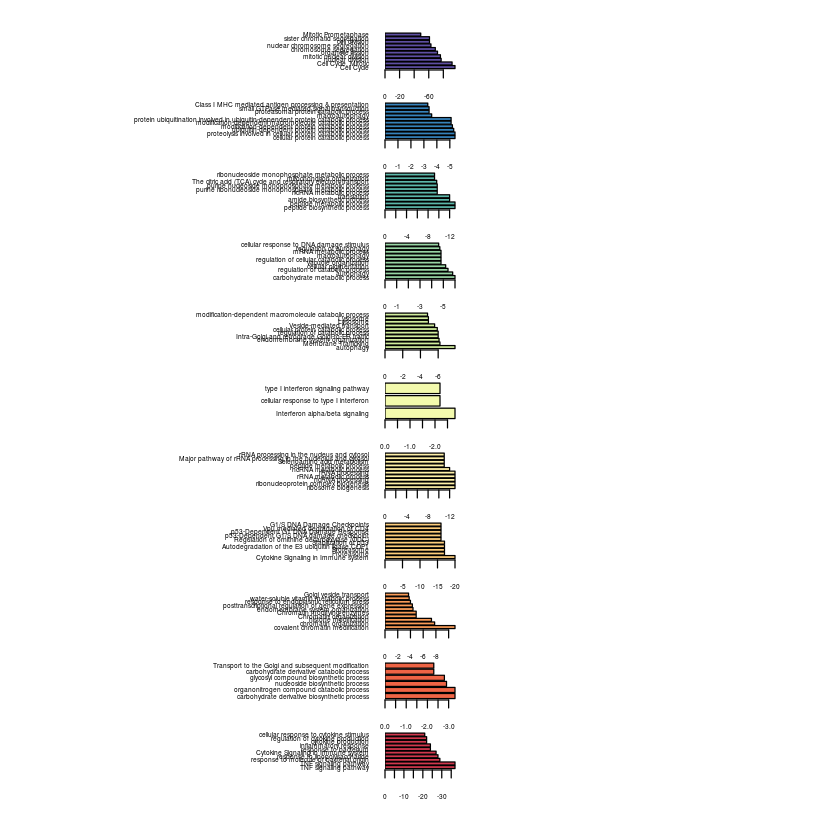

In [5]:
layout(matrix(1:12, byrow = TRUE), respect = TRUE)
for (cluster in 1:12){

GO_matrix_cluster_select = GO_matrix[GO_matrix$cluster == cluster,]
color_cluster = names(sort(table(brewer_dynamicColors)))[13 - cluster]

if (dim(GO_matrix_cluster_select)[1] > 0){
    min_value = min(as.numeric(as.character(GO_matrix_cluster_select$Log.q.value)))
    par(mar=c(0,0,2,0))
    barplot(as.numeric(as.character(GO_matrix_cluster_select$Log.q.value)), 
            names.arg= GO_matrix_cluster_select$Description, col=color_cluster, horiz=T , 
            las=1, xlim =c(0,min_value), cex.names=0.5, cex.axis= 0.5, width= 10)
}
}

In [11]:
pdf("GO_annotations.pdf", width= 24, height = 24)  
layout(matrix(1:12, byrow = TRUE), respect = TRUE)

for (cluster in 1:12){
   
GO_matrix_cluster_select = GO_matrix[GO_matrix$cluster == cluster,]
color_cluster = names(sort(table(brewer_dynamicColors)))[13 - cluster]
   

if (dim(GO_matrix_cluster_select)[1] > 0){
    min_value = min(as.numeric(as.character(GO_matrix_cluster_select$Log.q.value)))
    barplot(as.numeric(as.character(GO_matrix_cluster_select$Log.q.value)), 
            names.arg= GO_matrix_cluster_select$Description, col=color_cluster, horiz=T , las=1, 
            xlim =c(0,min_value), main=cluster)
}
}

dev.off()

png 
  2

In [ ]:
https://stackoverflow.com/questions/31319942/change-the-size-of-a-plot-when-plotting-multiple-plots-in-r

In [278]:
?layout

In [151]:
?barplot

In [195]:
dim(GO_matrix_cluster_select)[1]

[1] 0

In [72]:
dim(sM1)
dim(TPM)

[1] 12618    20

[1] 9745   20

In [ ]:
########
#Chris his plot 
for (which.module in names(table(dynamicColors))){
  MEs = ME[, paste("ME",which.module, sep="")]
}

 
mean_ME = cbind(apply(ME[targets$Strain_C57 == 1,],2,mean), 
  apply(ME[targets$Strain_Balb == 1,],2,mean), 
  apply(ME[targets$Strain_NOD == 1,],2,mean), 
  apply(ME[targets$Strain_PWK == 1,],2,mean), 
  apply(ME[targets$Strain_Spret == 1,],2,mean))
  
colnames(mean_ME) = c('C57', 'Balb', "NOD", "PWK", "SPRET")


pdf("Chris_heatmap_module_eigengene_expression.pdf")
labeledHeatmap(Matrix = mean_ME,
               xLabels = colnames(mean_ME),
               yLabels = rownames(mean_ME),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               cex.text = 0.45, setStdMargins=FALSE)
dev.off()

#mean_ME_select = mean_ME[c(3,4,5,8,11,12,15,16),]

In [ ]:
pdf("Chris_heatmap_module_eigengene_expression_selected.pdf")
labeledHeatmap(Matrix = mean_ME_select,
               xLabels = colnames(mean_ME_select),
               yLabels = rownames(mean_ME_select),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               cex.text = 0.45, setStdMargins=FALSE)
dev.off()

###Repeat with selection of modules 

modules_annotation = cbind(dynamicColors, Annotation)
modules_annotation = modules_annotation[order(modules_annotation$dynamicColors),]

write.table(modules_annotation, "modules_annotation.txt", sep ="\t", quote= FALSE, row.names= FALSE)

In [ ]:
##Make metascape multilist 
for (i in 1:length(unique(dynamicColors))) {
  write.table(c(unique(dynamicColors)[i], as.character(Annotation$Annotation.Divergence_01[dynamicColors == unique(dynamicColors)[i]])), 
              paste(unique(dynamicColors)[i], "-WGCNA-module_new.txt", sep=""), sep="\t", quote= FALSE,  row.names = FALSE)
}

